Test out SVD on the Latin Hypercube Design $P_0(k)$s

In [1]:
import numpy as np 
import scipy as sp
from sklearn.decomposition import PCA
from sklearn.utils.extmath import svd_flip

# -- local -- 
import env
import data as Dat

In [2]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

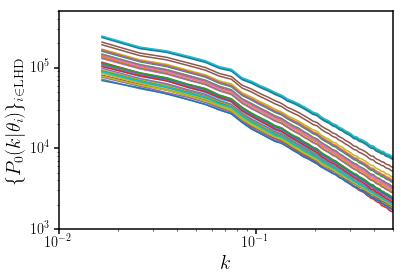

In [4]:
fig = plt.figure()
sub = fig.add_subplot(111)
for i in range(pk_lhd.shape[0]): 
    sub.plot(k_arr, pk_lhd[i,:])
sub.set_xlabel(r'$k$', fontsize=20)
sub.set_xlim([0.01, 0.5])
sub.set_xscale('log')
sub.set_ylabel(r'$\{P_0(k|\theta_i)\}_{i \in \mathrm{LHD}}$', fontsize=20)
sub.set_ylim([10**3, 5e5])
sub.set_yscale('log')

In [5]:
dpk_lhd = (pk_lhd - np.mean(pk_lhd, axis=0))/np.std(pk_lhd, axis=0)

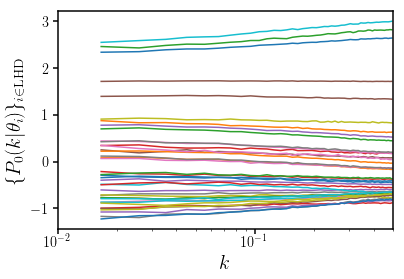

In [130]:
fig = plt.figure()
sub = fig.add_subplot(111)
for i in range(pk_lhd.shape[0]): 
    sub.plot(k_arr, dpk_lhd[i,:])
sub.set_xlabel(r'$k$', fontsize=20)
sub.set_xlim([0.01, 0.5])
sub.set_xscale('log')
sub.set_ylabel(r'$\{P_0(k|\theta_i)\}_{i \in \mathrm{LHD}}$', fontsize=20)
#sub.set_ylim([10**3, 5e5])
#sub.set_yscale('log')

In [131]:
U, sigma, V = np.linalg.svd(dpk_lhd)

In [132]:
print U.shape, sigma.shape, V.shape

(40, 40) (40,) (49, 49)


In [133]:
pc = np.dot(U, np.diag(sigma))/np.sqrt(len(sigma))
w_pc = np.sqrt(len(sigma)) * V

In [134]:
print pc.shape
print w_pc.shape

(40, 40)
(49, 49)


In [153]:
(np.dot(dpk_lhd[0,:], w_pc[:10,:].T)/len(sigma)).shape

(10,)

In [149]:
print np.allclose(np.dot(dpk_lhd, w_pc[:40,:].T)/len(sigma), pc)

True


In [135]:
explained_variance_ = (sigma ** 2) / (dpk_lhd.shape[0] - 1)

In [136]:
print explained_variance_

[  5.00514403e+01   2.01144675e-01   1.25437098e-03   7.89356813e-04
   3.30544583e-04   2.77507858e-04   1.78814286e-04   1.46655422e-04
   1.03058813e-04   9.60736510e-05   8.89086381e-05   8.53325374e-05
   6.47566787e-05   5.56409071e-05   4.64862543e-05   3.60662098e-05
   3.41266527e-05   3.21696177e-05   2.84242633e-05   2.79101865e-05
   2.42567041e-05   2.06595294e-05   1.88235951e-05   1.59901871e-05
   1.09092286e-05   1.07391467e-05   9.77723238e-06   8.31837085e-06
   6.91417752e-06   6.27119115e-06   4.66448774e-06   3.61144373e-06
   2.62378066e-06   2.09719555e-06   1.42157097e-06   1.23495288e-06
   5.72399524e-07   1.86929264e-07   7.31769074e-16   1.72651586e-30]


(40, 49)


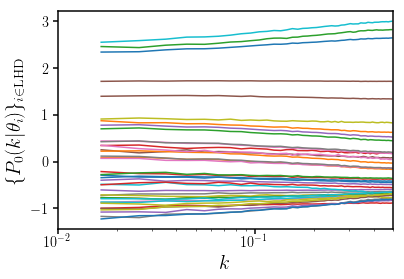

In [138]:
dpk_recon = np.dot(pc[:,:10], w_pc[:10, :])
print dpk_recon.shape
fig = plt.figure()
sub = fig.add_subplot(111)
for i in range(pk_lhd.shape[0]): 
    sub.plot(k_arr, dpk_recon[i,:].T)
sub.set_xlabel(r'$k$', fontsize=20)
sub.set_xlim([0.01, 0.5])
sub.set_xscale('log')
sub.set_ylabel(r'$\{P_0(k|\theta_i)\}_{i \in \mathrm{LHD}}$', fontsize=20)

In [139]:
dpk_recon = np.dot(pc, w_pc[:40, :])
#dpk_recon = np.matrix(U) * np.d#iag(sigma) * np.matrix(V[:40, :])
print dpk_recon.shape

(40, 49)


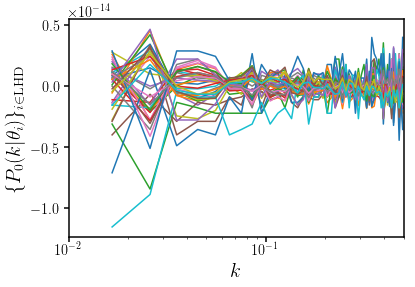

In [140]:
fig = plt.figure()
sub = fig.add_subplot(111)
for i in range(pk_lhd.shape[0]): 
    sub.plot(k_arr, (dpk_recon[i,:]-dpk_lhd[i,:]).T)
sub.set_xlabel(r'$k$', fontsize=20)
sub.set_xlim([0.01, 0.5])
sub.set_xscale('log')
sub.set_ylabel(r'$\{P_0(k|\theta_i)\}_{i \in \mathrm{LHD}}$', fontsize=20)